**BIAS**

In machine learning, "bias" refers to the error introduced by approximating a Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. High bias can cause the model to miss relevant relations between features and target outputs, leading to underfitting. This occurs when the model is too simple to capture the underlying trends in the data.

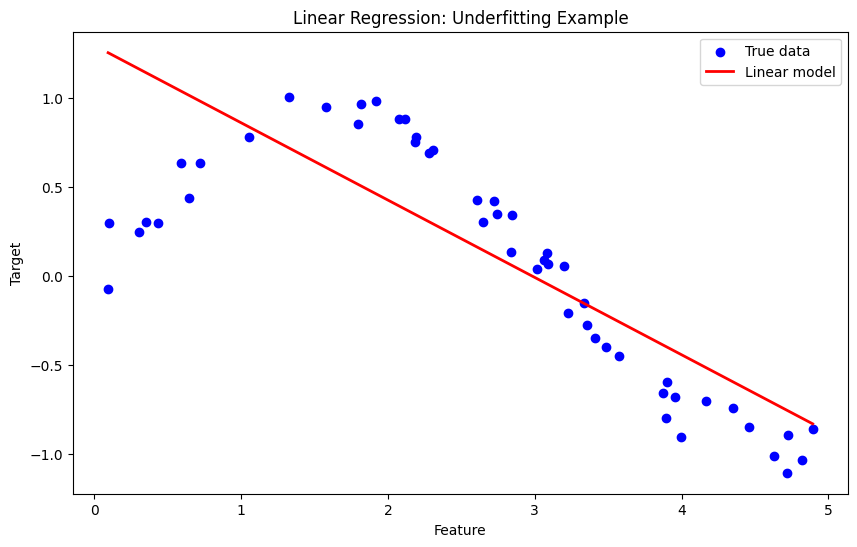

Train Error (MSE): 0.14
Test Error (MSE): 0.35


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generating synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(50) * 0.1  # True relationship + noise

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Fiting a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training set
y_pred_train = model.predict(X_train)

# Predict on test set
y_pred_test = model.predict(X_test)

# Plot outputs
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='True data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear model')

plt.title('Linear Regression: Underfitting Example')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Calculate mean squared error
train_error = mean_squared_error(y_train, y_pred_train)
test_error = mean_squared_error(y_test, y_pred_test)
print(f'Train Error (MSE): {train_error:.2f}')
print(f'Test Error (MSE): {test_error:.2f}')


**VARIANCE**

Variance measures the model's sensitivity to fluctuations in the training data. High variance means the model learns noise in the training data instead of the intended outputs, leading to overfitting. This happens when the model is too complex and captures random noise in the data.

Train Error (MSE): 0.01
Test Error (MSE): 0.94


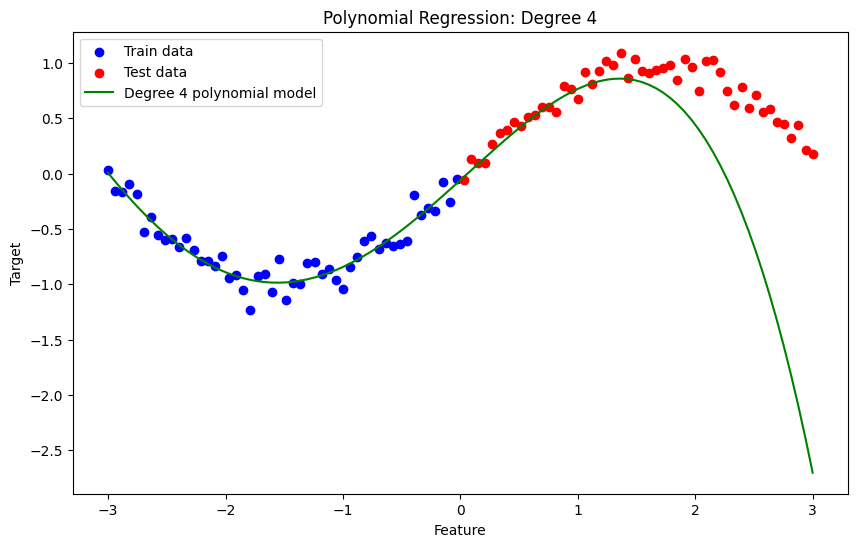

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, size=X.shape)  # True relationship + noise

# Split the data into training and test sets
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]
y_test = y[50:]

# Fit polynomial regression model of degree 4
degree = 4
polynomial_features = PolynomialFeatures(degree=degree)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict on training set
y_pred_train = model.predict(X_poly_train)

# Predict on test set
y_pred_test = model.predict(X_poly_test)

# Plot outputs
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='red', label='Test data')

X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = polynomial_features.transform(X_plot)
plt.plot(X_plot, model.predict(X_plot_poly), color='green', label=f'Degree {degree} polynomial model')

# Calculate mean squared error
train_error = mean_squared_error(y_train, y_pred_train)
test_error = mean_squared_error(y_test, y_pred_test)
print(f'Train Error (MSE): {train_error:.2f}')
print(f'Test Error (MSE): {test_error:.2f}')

plt.title(f'Polynomial Regression: Degree {degree}')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


### Deep Neural Networks

A deep neural network (DNN) is a sophisticated type of artificial neural network (ANN) that features multiple layers of interconnected neurons, giving it the term "deep" due to its extensive layer hierarchy. These networks excel at learning complex, hierarchical representations of data and are utilized in a range of machine learning tasks such as image and speech recognition, natural language processing, and beyond.

#### Input Layer

The input layer is where the raw data enters the network. This data can take various forms, such as the pixels of an image, words from a text, or numerical attributes from a dataset. Each neuron in this layer corresponds to a specific feature or attribute of the input data.

#### Hidden Layers

Hidden layers sit between the input and output layers. Each hidden layer applies a linear transformation using weights and biases, followed by a non-linear activation function like ReLU, sigmoid, or tanh. This non-linearity is crucial as it enables the network to learn complex patterns in the data. The presence of multiple hidden layers is what makes a neural network "deep," allowing it to develop intricate representations of the input data.

#### Output Layer

The output layer produces the network's final output. The structure of this layer varies based on the task at hand:

- For binary classification, there is usually one neuron with a sigmoid activation function to output probabilities.
- For multi-class classification, there are multiple neurons, one for each class, with a softmax activation to output class probabilities.
- For regression tasks, there is typically one neuron with a linear activation function to output continuous values.

#### Activation Functions

Activation functions introduce non-linearities into the network, allowing it to learn complex data patterns. Popular activation functions include:

- **ReLU (Rectified Linear Unit)**: Simple and effective in most scenarios.
- **Sigmoid**: Used in binary classification to output probabilities between 0 and 1.
- **Tanh (Hyperbolic Tangent)**: Squashes output to a range of [-1, 1].

#### Loss Function

The loss function measures the difference between the network's predicted outputs and the actual targets (labels) during training. It quantifies the model's performance after each iteration of optimization. Common loss functions include:

- **Mean Squared Error (MSE)** for regression tasks.
- **Cross-Entropy Loss** for classification tasks.

#### Backpropagation

Backpropagation, short for "backward propagation of errors," is a key algorithm for training neural networks, including DNNs. It enables the network to adjust its weights and biases to minimize the difference between its predicted outputs and the actual targets in supervised learning.

#### Forward Pass

During the forward pass, input data moves through the neural network layer by layer. Each layer performs a linear transformation (weighted sum of inputs) followed by a non-linear activation function. The output of the final layer provides the network's prediction (or logits in the case of classification before applying softmax).

#### Loss Calculation

The network's output is compared to the actual labels using a loss function. This function quantifies the difference between the predicted output and the actual target.

#### Backward Pass

The backward pass is where backpropagation comes into play. The goal is to compute the gradient of the loss function with respect to each parameter (weights and biases) in the network. This involves propagating the error backward through the network, from the output layer to the input layer, adjusting the weights and biases to reduce the error.

Epoch [100/1000], Loss: 0.4150
Epoch [200/1000], Loss: 0.3032
Epoch [300/1000], Loss: 0.2812
Epoch [400/1000], Loss: 0.2758
Epoch [500/1000], Loss: 0.2730
Epoch [600/1000], Loss: 0.2702
Epoch [700/1000], Loss: 0.2666
Epoch [800/1000], Loss: 0.2622
Epoch [900/1000], Loss: 0.2565
Epoch [1000/1000], Loss: 0.2486


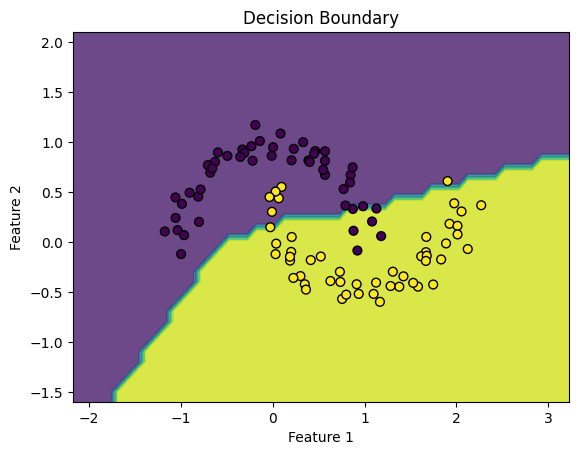

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Reshape to [batch_size, 1]

# Define a simple neural network
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(2, 5)   # Input size is 2, output size is 5
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5, 1)   # Input size is 5, output size is 1 (binary classification)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.sigmoid(x)

# Initialize the model, loss function, and optimizer
model = NeuralNet()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = (Z > 0.5).float()
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

# Evaluate the model
model.eval()
plot_decision_boundary(model, X, y)
plt.show()


## Regularization Techniques in Machine Learning
Regularization techniques are essential in machine learning for preventing overfitting. Overfitting occurs when a model learns the training data too well, capturing noise and details that do not generalize to new, unseen data. Regularization adds a penalty to the loss function to discourage the model from learning overly complex patterns and using large weights.

L2 Regularization (Weight Decay)
One common regularization technique is L2 regularization, also known as weight decay. L2 regularization penalizes the squared magnitude of all model weights, effectively shrinking them towards zero but not eliminating them. This encourages simpler models that are less likely to overfit.

Here’s an example of implementing L2 regularization in a simple neural network using Python and a machine learning library like TensorFlow or PyTorch.

## Example Code with L2 Regularization in TensorFlow

Epoch 1/50, Loss: 0.6391
Epoch 2/50, Loss: 0.4695
Epoch 3/50, Loss: 0.3513
Epoch 4/50, Loss: 0.3365
Epoch 5/50, Loss: 0.2025
Epoch 6/50, Loss: 0.1192
Epoch 7/50, Loss: 0.3693
Epoch 8/50, Loss: 0.4176
Epoch 9/50, Loss: 0.3650
Epoch 10/50, Loss: 0.3053
Epoch 11/50, Loss: 0.3311
Epoch 12/50, Loss: 0.2203
Epoch 13/50, Loss: 0.2824
Epoch 14/50, Loss: 0.2432
Epoch 15/50, Loss: 0.2150
Epoch 16/50, Loss: 0.2437
Epoch 17/50, Loss: 0.1704
Epoch 18/50, Loss: 0.2147
Epoch 19/50, Loss: 0.2342
Epoch 20/50, Loss: 0.2981
Epoch 21/50, Loss: 0.2010
Epoch 22/50, Loss: 0.3243
Epoch 23/50, Loss: 0.1898
Epoch 24/50, Loss: 0.2581
Epoch 25/50, Loss: 0.3640
Epoch 26/50, Loss: 0.2456
Epoch 27/50, Loss: 0.1204
Epoch 28/50, Loss: 0.1928
Epoch 29/50, Loss: 0.1808
Epoch 30/50, Loss: 0.3605
Epoch 31/50, Loss: 0.1704
Epoch 32/50, Loss: 0.2167
Epoch 33/50, Loss: 0.1407
Epoch 34/50, Loss: 0.2255
Epoch 35/50, Loss: 0.1224
Epoch 36/50, Loss: 0.1631
Epoch 37/50, Loss: 0.1880
Epoch 38/50, Loss: 0.1737
Epoch 39/50, Loss: 0.

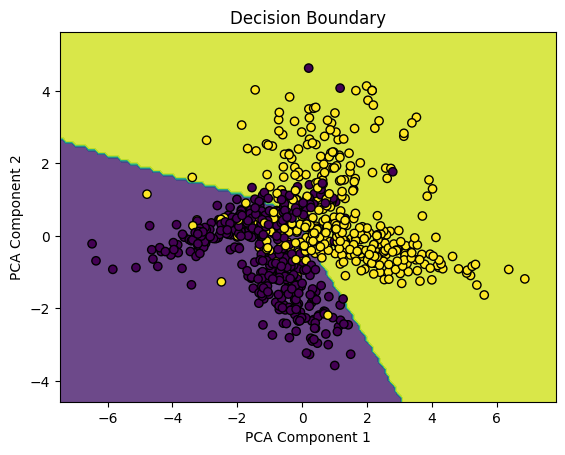

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = SimpleNN()

# Define the optimizer with L2 regularization
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.BCELoss()

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')

# Use PCA to reduce feature space to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_pca = pca.inverse_transform(grid)
    grid_tensor = torch.tensor(grid_pca, dtype=torch.float32)
    Z = model(grid_tensor).detach().numpy()
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Decision Boundary')

# Plot the decision boundary
plot_decision_boundary(model, X_train_2d, y_train)
plt.show()


### Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used for analyzing visual data. They are designed to process structured grid-like data, such as images, and have become a cornerstone of computer vision applications like image classification, object detection, and image segmentation.

#### Components of CNN:

1. **Convolutional Layers:**
    - Convolutional layers are the core building blocks of CNNs. They consist of filters (kernels) that slide over the input image. Each filter performs element-wise multiplication and summation to produce feature maps. These filters capture spatial hierarchies of features in the input data, such as edges, textures, and patterns.

2. **ReLU Activation:**
    - Rectified Linear Unit (ReLU) activation functions are applied after convolutional layers. ReLU introduces non-linearity, enabling the network to learn complex patterns and relationships in the data. The function outputs zero for negative input values and passes positive input values unchanged.

3. **Pooling Layers:**
    - Pooling layers (e.g., MaxPooling or AveragePooling) follow convolutional layers to reduce the spatial dimensions of each feature map while retaining important information. Pooling helps control overfitting, reduces computational complexity, and makes the network more robust to small translations in the input.

4. **Fully Connected Layers:**
    - Fully connected (dense) layers are typically found at the end of CNN architectures. These layers connect every neuron from the previous layer to every neuron in the next layer. They are responsible for making predictions based on the features extracted by the earlier layers.

5. **Output Layer:**
    - The final layer of a CNN produces the network's predictions. Depending on the task, the output layer may have one or multiple neurons. For classification tasks, the output neurons represent class labels (using softmax activation for multi-class classification). For regression tasks, the output neurons provide continuous values.

### Example Code of a Simple CNN in TensorFlow

Here’s an example of a simple CNN using TensorFlow for image classification

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 47s 30ms/step - loss: 0.1447 - accuracy: 0.9557 - val_loss: 0.0571 - val_accuracy: 0.9829
Epoch 2/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0407 - val_accuracy: 0.9893
Epoch 3/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0497 - val_accuracy: 0.9867
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0568 - val_accuracy: 0.9843
Epoch 5/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0169 - accuracy: 0.9943 - val_loss: 0.0448 - val_accuracy: 0.9881
Epoch 6/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.0425 - val_accuracy: 0.9897
Epoch 7/10
1500/1500 [==============================] - 47s

## RNN (Recurrent Neural Networks)

Recurrent Neural Networks (RNNs) are designed for sequential data where the order of data points is crucial. They are effective for tasks like natural language processing (NLP), time series prediction, and sequence generation. Here's a breakdown of their main components:

### Components of an RNN

**Recurrent Connections:**
- RNNs have loops that allow information to persist over time.
- Each neuron's output depends on both the current input and previous inputs.

**Time Steps:**
- Data is processed in sequences or time steps.
- Each time step corresponds to a specific point in the sequence (e.g., a word in a sentence or a timestamp in a time series).

**Hidden State:**
- RNNs maintain a hidden state vector at each time step.
- This vector summarizes the information about the sequence seen so far.
- It is updated at each time step based on the current input and the previous hidden state.

## Transformers

Transformers are a type of neural network architecture designed to handle sequential data efficiently. They are particularly effective in NLP tasks due to their ability to model long-range dependencies and parallelize computation.

### Key Components of Transformers

**Attention Mechanism:**
- Allows the model to focus on different parts of the input sequence for each output.
- The "self-attention" mechanism is particularly important, where each word can attend to all other words in the sequence.

**Positional Encoding:**
- Since transformers do not process data sequentially, they use positional encodings to capture the order of the sequence.

**Encoder-Decoder Structure:**
- The transformer model consists of an encoder to process the input and a decoder to produce the output.
- Each encoder and decoder layer consists of self-attention and feed-forward neural networks.

### BERT (Bidirectional Encoder Representations from Transformers)

**BERT** is a specific implementation of transformers developed by Google AI. It pre-trains a deep bidirectional representation of language using transformers and has significantly advanced the field of NLP.

In [ ]:
# Install the required libraries
!pip install transformers datasets torch

import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset

# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Binary classification

# Load a sample dataset
# For this example, we use the 'imdb' dataset for sentiment analysis
dataset = load_dataset('imdb')

# Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Apply the tokenizer to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.rename_column('label', 'labels')

# Set format for PyTorch
tokenized_datasets.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

# Split the data
train_dataset = tokenized_datasets['train']
eval_dataset = tokenized_datasets['test']

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    evaluation_strategy="epoch",     # evaluation strategy to use
    learning_rate=2e-5,               # learning rate
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    num_train_epochs=3,              # number of training epochs
    weight_decay=0.01,               # strength of weight decay
)

# Initialize Trainer
trainer = Trainer(
    model=model,                         # the instantiated model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=eval_dataset            # evaluation dataset
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()

print("Evaluation results:", results)

# Make predictions on new data
texts = ["I love this movie!", "I hate this movie!"]
encodings = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

with torch.no_grad():
    outputs = model(**encodings)
    predictions = torch.argmax(outputs.logits, dim=-1)

print("Predictions:", predictions.tolist())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss


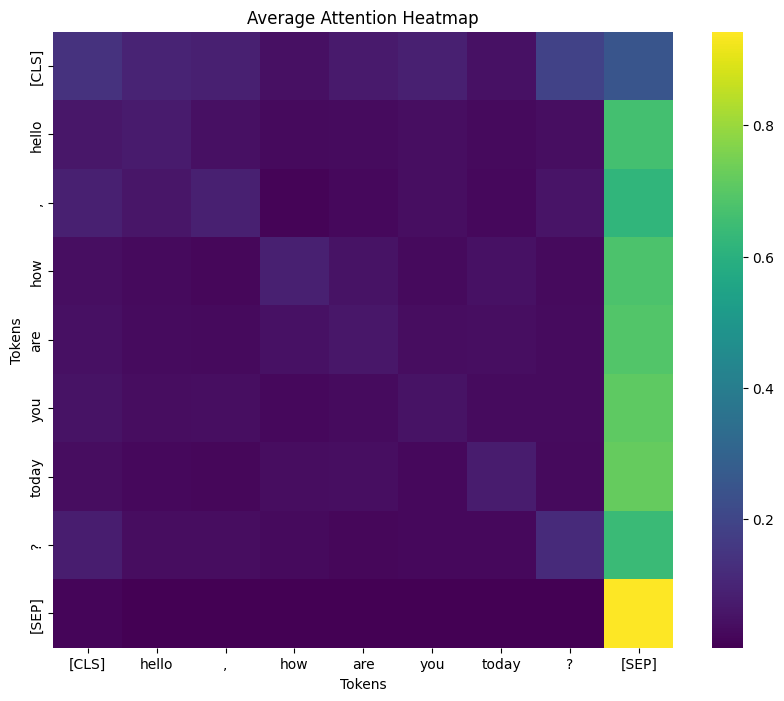

In [6]:
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Load pre-trained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)

# Example text
text = "Hello, how are you today?"

# Tokenize input
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
input_ids = inputs['input_ids']

# Forward pass
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions

# Extract attention scores from the last layer
attention = attentions[-1][0].cpu().numpy()  # [batch, num_heads, seq_len, seq_len]

# Average across all heads
avg_attention = attention.mean(axis=0)  # [seq_len, seq_len]

# Get the token labels
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Plot the average attention
plt.figure(figsize=(10, 8))
sns.heatmap(avg_attention, cmap="viridis", xticklabels=tokens, yticklabels=tokens)
plt.title("Average Attention Heatmap")
plt.xlabel("Tokens")
plt.ylabel("Tokens")
plt.show()
